In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
# load model from path
model= tf.saved_model.load(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\ObjectDetection Model\faster_rcnn_resnet50_v1_640x640_coco17_tpu-8\saved_model")


In [5]:
def read_label_map(label_map_path):

    item_id = None
    item_name = None
    items = {}
    
    with open(label_map_path, "r") as file:
        for line in file:
            line.replace(" ", "")
            if line == "item{":
                pass
            elif line == "}":
                pass
            elif "id" in line:
                item_id = int(line.split(":", 1)[1].strip())
            elif "display_name" in line:
                item_name = line.split(":", 1)[1].replace("'", "").replace('"', "").strip()

            if item_id is not None and item_name is not None:
                items[item_id] = item_name
                item_id = None
                item_name = None

    return items

In [6]:
class_names= read_label_map(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\coco_classes.pbtxt")

In [7]:
class_names

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

### Load Image

In [42]:
# read image and preprocess
# img = cv2.imread(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\images_to_test\Street.jpg")
# img = cv2.imread(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\images_to_test\bench.jpg")
img = cv2.imread(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\images_to_test\street2.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# get height and width of image
h, w, _ = img.shape

input_tensor = np.expand_dims(img, 0)

# predict from model
resp = model(input_tensor)

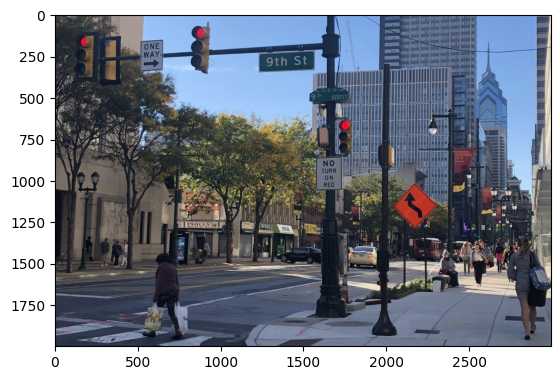

In [43]:
plt.imshow(img)
plt.show()

In [37]:
resp.keys()

dict_keys(['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores'])

In [12]:
resp["detection_boxes"]

<tf.Tensor: shape=(1, 300, 4), dtype=float32, numpy=
array([[[0.5207124 , 0.21444975, 0.88828033, 0.30031505],
        [0.59145194, 0.505886  , 0.78542763, 0.5603792 ],
        [0.5457051 , 0.14957516, 0.8590603 , 0.22495194],
        ...,
        [0.5705715 , 0.35848874, 0.62393135, 0.3908862 ],
        [0.55784625, 0.38073364, 0.69486016, 0.4193689 ],
        [0.6978241 , 0.5806519 , 0.74738795, 0.6040434 ]]], dtype=float32)>

In [13]:
resp["detection_scores"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[0.99692196, 0.98533905, 0.9845242 , 0.98324734, 0.95166206,
        0.8776327 , 0.8324042 , 0.7601265 , 0.4185999 , 0.38058838,
        0.33334407, 0.2659003 , 0.17902662, 0.16585582, 0.16094969,
        0.14096573, 0.12942241, 0.11989796, 0.11883533, 0.1175783 ,
        0.11345538, 0.1118455 , 0.10778891, 0.10753109, 0.10245144,
        0.09699355, 0.08807721, 0.08717518, 0.07809395, 0.07469807,
        0.0740508 , 0.06622101, 0.06079041, 0.06008705, 0.0536056 ,
        0.04970643, 0.04818212, 0.04668774, 0.04628415, 0.0456898 ,
        0.04434041, 0.0432676 , 0.04233964, 0.04137794, 0.04045254,
        0.03899117, 0.03868864, 0.03719312, 0.0352355 , 0.03490321,
        0.03468961, 0.03464939, 0.03462098, 0.03409148, 0.03286966,
        0.03131793, 0.03011656, 0.02999022, 0.0299667 , 0.02980345,
        0.02799747, 0.02781141, 0.02691969, 0.02677117, 0.02658685,
        0.02612289, 0.02586965, 0.02558219, 0.02541283, 0.02406793

In [14]:
resp["detection_classes"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1., 85.,
         1.,  1.,  1., 27., 64.,  2., 37.,  2., 10., 33.,  1., 31.,  1.,
         1.,  1., 62., 31., 38., 31.,  1.,  1., 10., 31.,  1.,  1.,  1.,
        31., 10., 37., 15., 42., 31., 64.,  1., 31., 14., 27.,  1.,  1.,
        86., 28.,  1., 31., 31., 31.,  1., 11.,  1.,  1., 33., 31., 31.,
         1., 27., 27., 31., 27.,  1., 64., 31., 31., 31.,  1.,  1.,  1.,
        31.,  1., 31., 43., 31., 31.,  1.,  1.,  1., 84.,  3., 38.,  1.,
         1., 31.,  1.,  1.,  3., 27.,  1., 31.,  1.,  1., 31., 31.,  3.,
         1.,  1., 41., 31.,  1., 31.,  2., 31.,  1.,  1., 33., 27., 31.,
        14., 62.,  1., 27., 84., 31., 31., 22.,  1., 33.,  1.,  1., 31.,
        31., 31., 31.,  1.,  1., 16., 31.,  1.,  1., 31.,  8.,  3., 88.,
         2., 64., 31.,  1., 27.,  1., 15., 15., 13., 41., 27., 27.,  1.,
         1., 31., 31.,  1.,  1.,  1., 27., 27., 27.,  1., 62., 62.,  3.,
 

In [53]:
# iterate over boxes, class_index and score list
for boxes, classes, scores in zip(resp['detection_boxes'].numpy(), resp['detection_classes'].numpy().astype(int), resp['detection_scores'].numpy()):
    for box, cls, score in zip(boxes, classes, scores): # iterate over sub values in list
        if score > 0.7: # we are using only detection with confidence of over 0.8
            ymin = int(box[0] * h)
            xmin = int(box[1] * w)
            ymax = int(box[2] * h)
            xmax = int(box[3] * w)
            # write classname for bounding box
            cv2.putText(img, class_names[cls], (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)
            # draw on image
            cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (128, 0, 128), 4)

# convert back to bgr and save image
cv2.imwrite("output.png", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

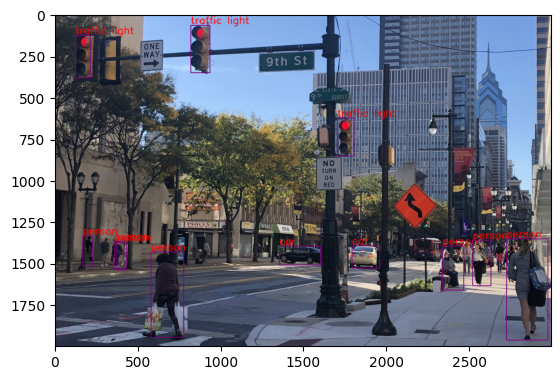

In [54]:
plt.imshow(img)
plt.show()